In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/My Drive/household_power_consumption.txt'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(file_path, sep=';', na_values='?', low_memory=False)

df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

df.drop(columns=['Date', 'Time'], inplace=True)

df.set_index('datetime', inplace=True)

df = df.apply(pd.to_numeric, errors='coerce')

df.dropna(inplace=True)

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB
None


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


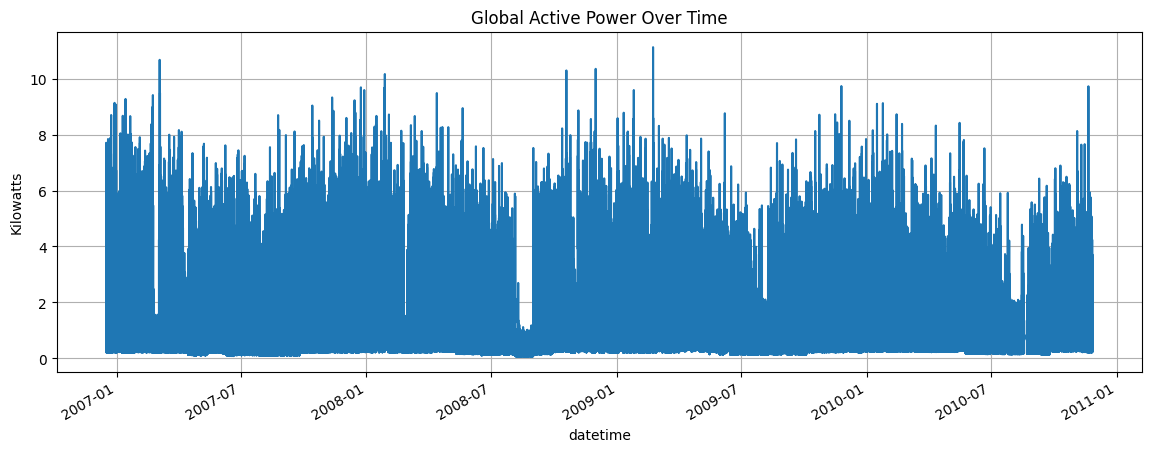

In [6]:
# Plot global active power over time
# Shows how electricity consumption changes minute-by-minute
# Spot patterns, spikes , and trends

plt.figure(figsize=(14, 5))
df['Global_active_power'].plot(title='Global Active Power Over Time', ylabel='Kilowatts')
plt.grid(True)
plt.show()


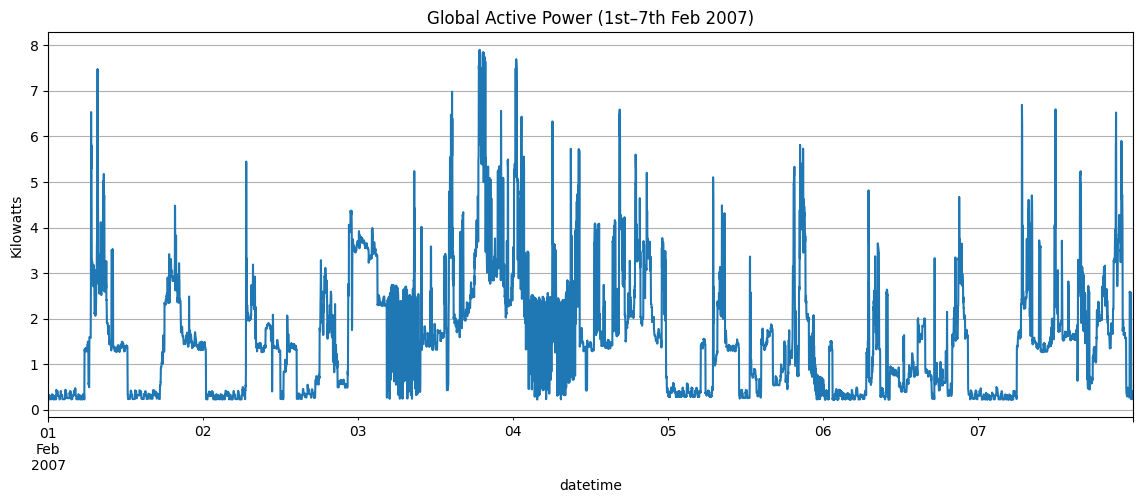

In [7]:
# 1 week - detailed view
# Zooming into a week helps analyze short-term behavior without clutter.
# See exactly when power usage peaks during the week

week_data = df['2007-02-01':'2007-02-07']

plt.figure(figsize=(14, 5))
week_data['Global_active_power'].plot(title='Global Active Power (1st–7th Feb 2007)', ylabel='Kilowatts')
plt.grid(True)
plt.show()


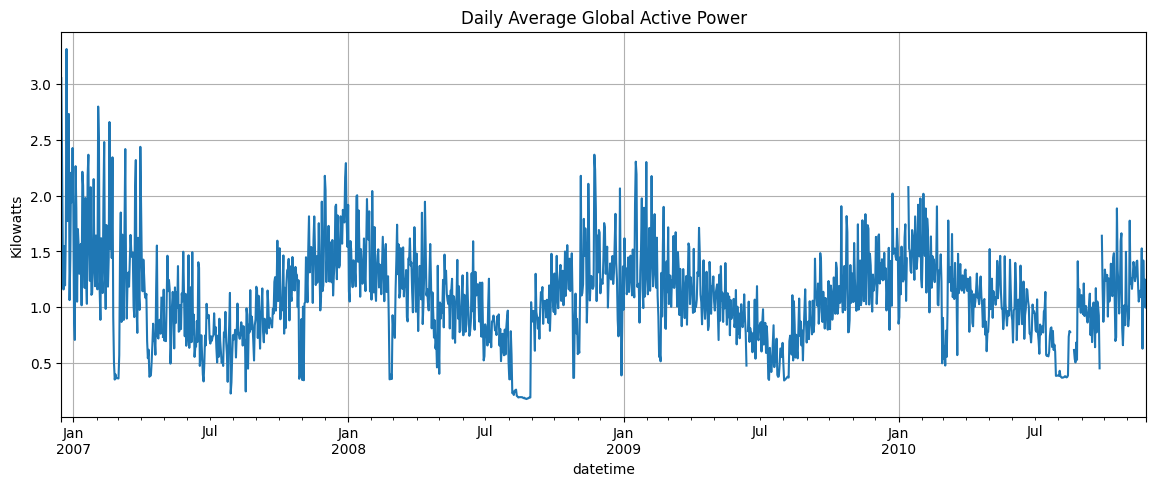

In [8]:
# Show daily consumption trends
# Helps identify if power usage is growing, shrinking, or stable day to day

daily_avg = df['Global_active_power'].resample('D').mean()

plt.figure(figsize=(14, 5))
daily_avg.plot(title='Daily Average Global Active Power', ylabel='Kilowatts')
plt.grid(True)
plt.show()


<Figure size 1400x600 with 0 Axes>

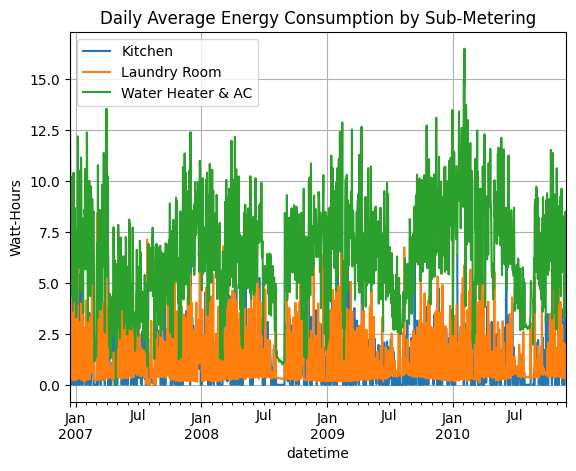

In [10]:
# Plot energy used by kitchen, laundry, etc
# Breaks down energy usage by different household devices

plt.figure(figsize=(14, 6))
df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].resample('D').mean().plot()
plt.title('Daily Average Energy Consumption by Sub-Metering')
plt.ylabel('Watt-Hours')
plt.grid(True)
plt.legend(['Kitchen', 'Laundry Room', 'Water Heater & AC'])
plt.show()


In [11]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month


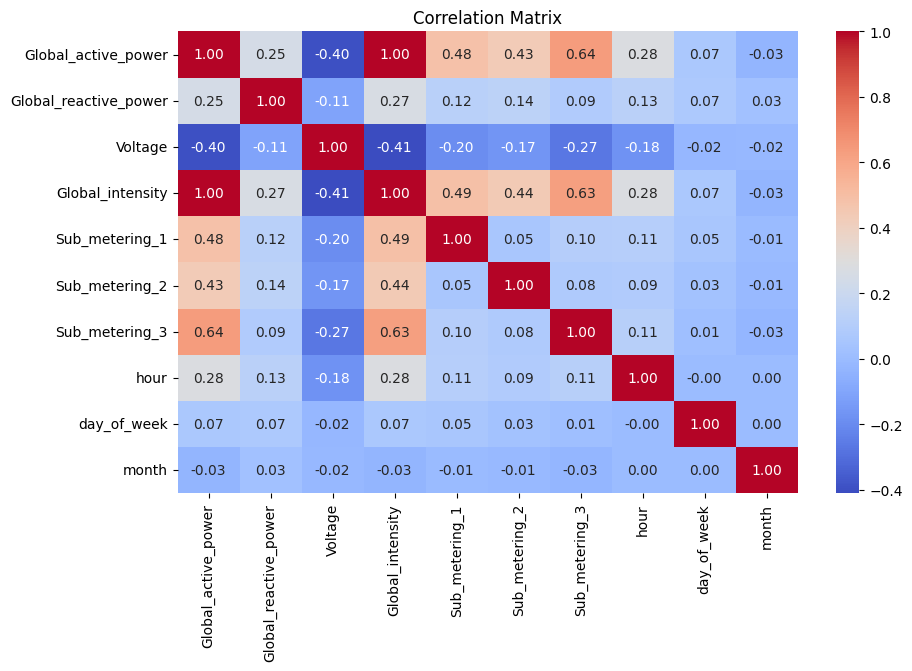

In [12]:
# Shows how different variables relate to each other
# Understand dependencies

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [13]:
df['day'] = df.index.day
df['year'] = df.index.year

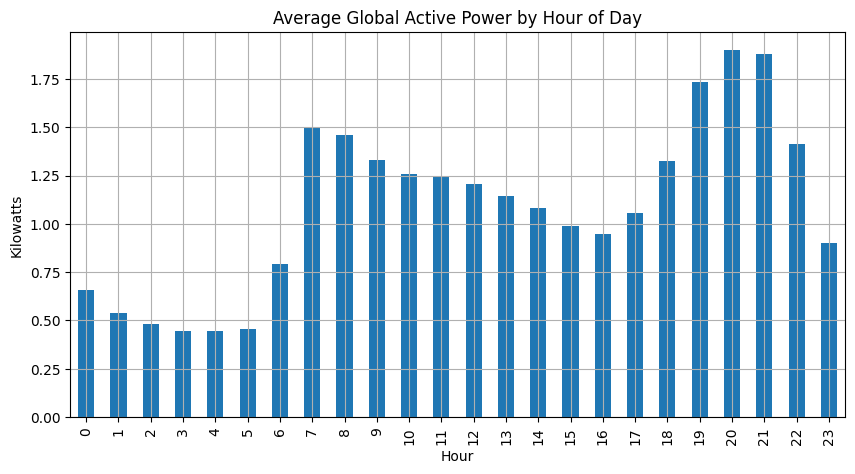

In [14]:
# Average usage by hour of day
# Reveals when energy consumption peaks

hourly_usage = df.groupby('hour')['Global_active_power'].mean()

plt.figure(figsize=(10, 5))
hourly_usage.plot(kind='bar')
plt.title('Average Global Active Power by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Kilowatts')
plt.grid(True)
plt.show()


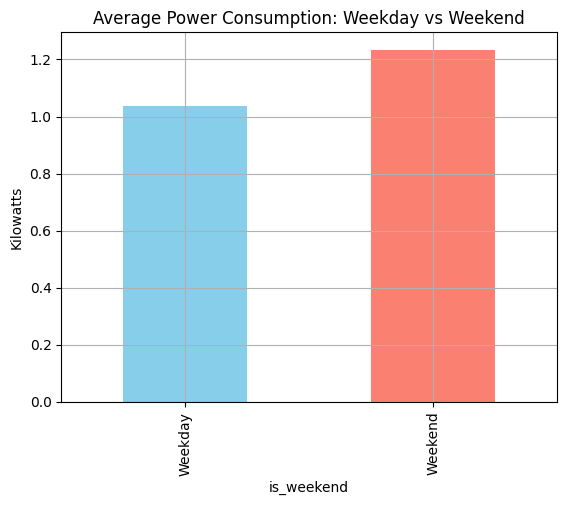

In [15]:
# Shows how average power use differs between weekends and weekdays
# Help identify changes in energy habits based on the day

df['is_weekend'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

weekend_usage = df.groupby('is_weekend')['Global_active_power'].mean()

weekend_usage.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Power Consumption: Weekday vs Weekend')
plt.ylabel('Kilowatts')
plt.grid(True)
plt.show()


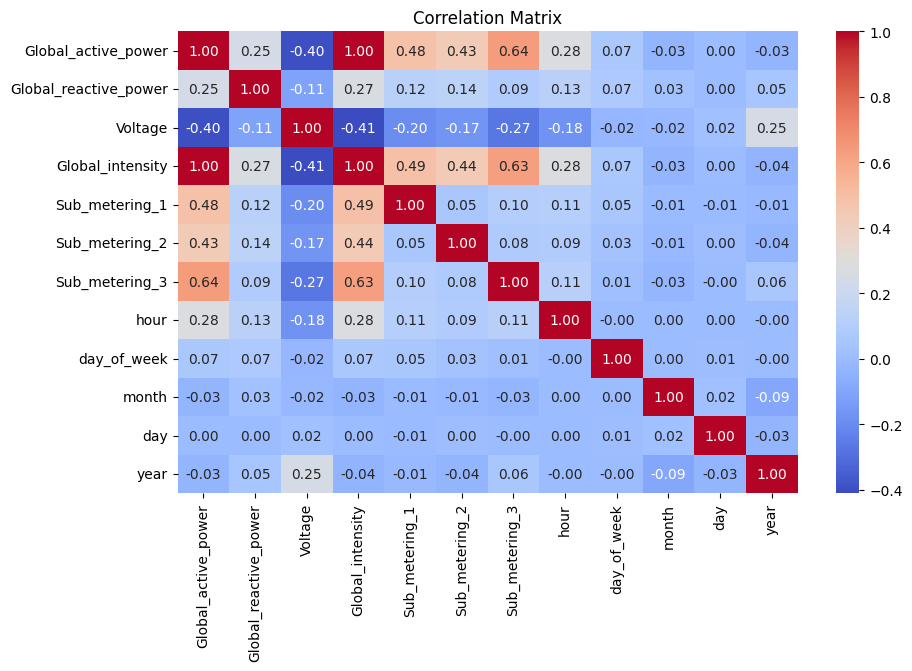

In [16]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [17]:
pip install openpyxl


In [18]:
df_subset = df.loc['2007-02-01':'2007-02-28']

df_subset.reset_index().to_excel('power_data_feb_2007.xlsx', index=False)

print("✅ Exported February 2007 data to Excel")


✅ Exported February 2007 data to Excel
